In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'dummy-most_frequent',
  'Test Dataset': 'ParlaCAP-HR-test',
  'Macro F1': 0.005687947435520251,
  'Micro F1': 0.0667433831990794,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'hr': {'Macro F1': 0.005687947435520251,
    'Micro F1': 0.0667433831990794}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'ParlaCAP-EN-test',
  'Macro F1': 0.030569692230635236,
  'Micro F1': 0.038636363636363635,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'en': {'Macro F1': 0.030569692230635236,
    'Micro F1': 0.038636363636363635}}},
 {'Model': 'dummy-most_frequent',
  'Test Dataset': 'ParlaCAP-EN-test',
  'Macro F1': 0.005439005439005439,
  'Micro F1': 0.06363636363636363,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'en': {'Macro F1': 0.005439005439005439,
    'Micro F1': 0.06363636363636363}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'ParlaCAP-HR-test',
  'Macro F1': 0.05387766624758243,
  'Mi

In [3]:
results_topic = []

lang_map = {
    "English": "en",
    "Croatian": "hr",
    #"Serbian": "sr",
    #"Bosnian": "bs"
}

for x in results:
    cur_result = {}
    cur_result["Model"] = x["Model"]
    for lang in ["English", "Croatian"]:
        lang_code = lang_map[lang]
        if lang_code in x['Language-Specific Scores']:
            cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang_code]["Macro F1"]
            cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang_code]["Micro F1"]
    results_topic.append(cur_result)

temp_results_df = pd.DataFrame(results_topic)
temp_results_df

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1)
0,dummy-most_frequent,0.005688,0.066743,NaN,NaN
1,dummy-stratified,NaN,NaN,0.030570,0.038636
2,dummy-most_frequent,NaN,NaN,0.005439,0.063636
3,dummy-stratified,0.053878,0.060990,NaN,NaN
4,ParlaCAP-classifier,NaN,NaN,0.745955,0.743468
5,ParlaCAP-classifier,0.681149,0.669113,NaN,NaN
6,gpt-4o-2024-08-06,0.670250,0.663982,NaN,NaN
7,gpt-4o-2024-08-06,NaN,NaN,0.746786,0.747727
8,gpt-3.5-turbo-0125,NaN,NaN,0.549831,0.550000
9,gpt-3.5-turbo-0125,0.493080,0.492520,NaN,NaN


In [4]:
merged_results = []

temp_results = temp_results_df.to_dict(orient="records")

for model in list(temp_results_df.Model.unique()):
	model_dict = {}
	model_dict["Model"] = model
	for x in temp_results:
		if x["Model"] == model:
			for lang in ["English", "Croatian"]:
				if x[f"{lang} (macro-F1)"] >= 0:
					model_dict[f"{lang} (macro-F1)"] = x[f"{lang} (macro-F1)"]
				if x[f"{lang} (micro-F1)"] >= 0:
					model_dict[f"{lang} (micro-F1)"] = x[f"{lang} (micro-F1)"]
	merged_results.append(model_dict)

results_df = pd.DataFrame(merged_results)
results_df

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1)
0,dummy-most_frequent,0.005688,0.066743,0.005439,0.063636
1,dummy-stratified,0.053878,0.060990,0.030570,0.038636
2,ParlaCAP-classifier,0.681149,0.669113,0.745955,0.743468
3,gpt-4o-2024-08-06,0.670250,0.663982,0.746786,0.747727
4,gpt-3.5-turbo-0125,0.493080,0.492520,0.549831,0.550000
5,gpt-4o-mini-2024-07-18,0.583878,0.582278,0.647676,0.647727
6,COMPLEMENTNB,0.019588,0.104718,0.008297,0.040909
7,SVC,0.073054,0.125432,0.028574,0.061364
8,llama3.3:latest,0.574237,0.578826,0.664342,0.665909
9,deepseek-r1:14b,0.291036,0.260069,0.438172,0.418182


In [20]:
results_df.to_json("results.json", orient="records", lines=True)

# Plot a bar plot

In [1]:
import pandas as pd

In [2]:
results_df = pd.read_json("results.json", orient="records", lines=True)

In [5]:
results_df

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1)
0,dummy-most_frequent,0.005688,0.066743,0.005439,0.063636
1,dummy-stratified,0.053878,0.060990,0.030570,0.038636
2,ParlaCAP-classifier,0.681149,0.669113,0.745955,0.743468
3,gpt-4o-2024-08-06,0.670250,0.663982,0.746786,0.747727
4,gpt-3.5-turbo-0125,0.493080,0.492520,0.549831,0.550000
5,gpt-4o-mini-2024-07-18,0.583878,0.582278,0.647676,0.647727


In [4]:
results_df = results_df.drop(index=[0])

In [5]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "dummy-stratified": "Dummy (Stratified)",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "XLM-R-ParlaSent": "Fine-Tuned BERT-Like Model"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

# Change the order of columns

results_df = results_df[['Model', 'Croatian (macro-F1)', 'Croatian (micro-F1)','English (macro-F1)', 'English (micro-F1)',]]

In [6]:
print(results_df.sort_values(by="Croatian (macro-F1)", ascending=False).to_markdown(index=False))

| Model                  |   Croatian (macro-F1) |   Croatian (micro-F1) |   English (macro-F1) |   English (micro-F1) |
|:-----------------------|----------------------:|----------------------:|---------------------:|---------------------:|
| ParlaCAP-classifier    |            0.681149   |             0.669113  |           0.745955   |            0.743468  |
| GPT-4o                 |            0.67025    |             0.663982  |           0.746786   |            0.747727  |
| GPT-4o-mini            |            0.583878   |             0.582278  |           0.647676   |            0.647727  |
| LLaMA 3.3              |            0.574237   |             0.578826  |           0.664342   |            0.665909  |
| Gemma 3                |            0.561091   |             0.556772  |           0.613566   |            0.611364  |
| GPT-3.5-Turbo          |            0.49308    |             0.49252   |           0.549831   |            0.55      |
| DeepSeek-R1-Distill    |      

<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

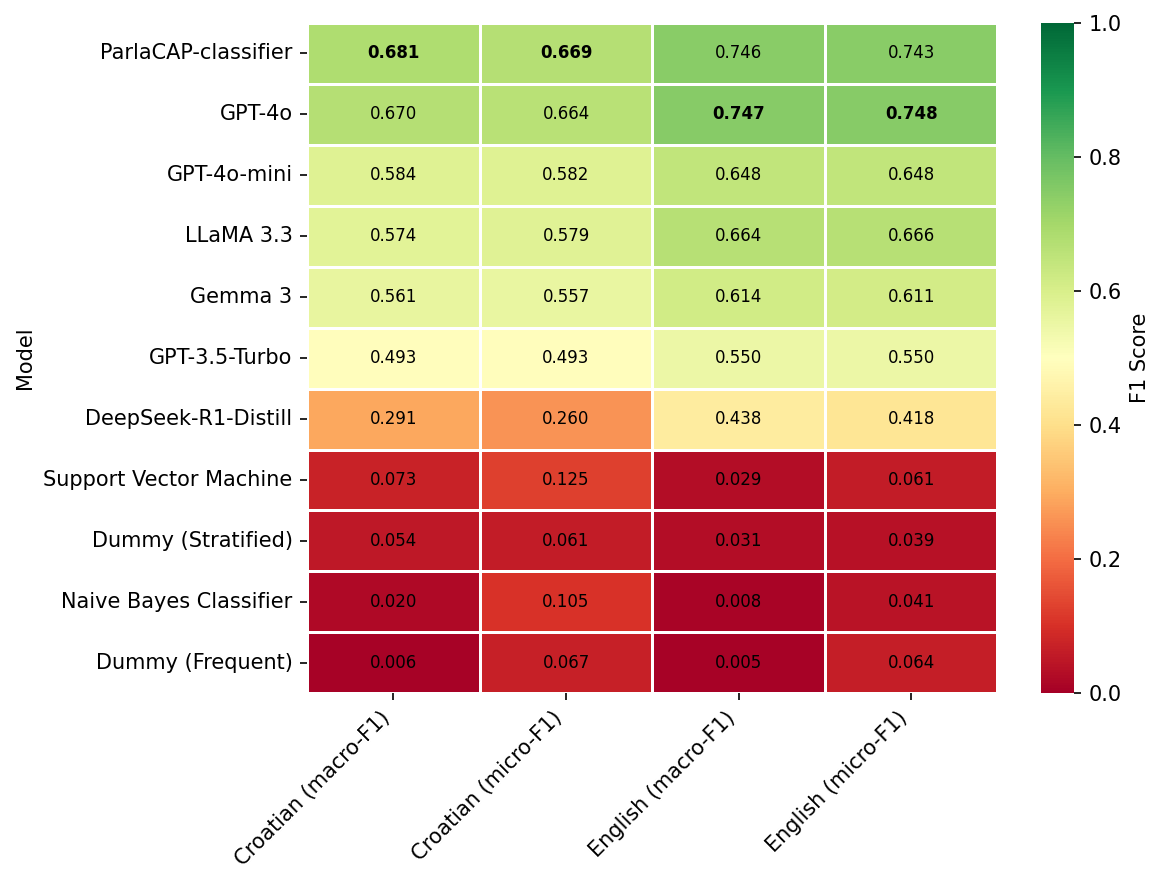

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=150)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Croatian (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("topic-results-heatmap.png", dpi=300)
plt


## Analyse precentage of Mix labels

In [8]:
import os

In [10]:
submission_folder = "../systems/local-GPT-models/submissions"

In [59]:
def add_predictions_to_dataset(dataset_name, results):
    """The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
    Args:
    - dataset_name: should be "ParlaSent-EN-test" or "ParlaSent-BCS-test"
    """
    # Load the dataset
    if dataset_name == "ParlaSent-EN-test":
        test_df = pd.read_json("datasets/ParlaSent-EN-test/ParlaSent_EN_test.jsonl", lines=True)
    elif dataset_name == "ParlaSent-BCS-test":
        test_df = pd.read_json("datasets/ParlaSent-BSC-test/ParlaSent_BCS_test.jsonl", lines=True)

    # Extract predictions
    y_pred = results["predictions"][0]["predictions"]
    test_df["y_pred"] = y_pred

    return test_df

In [11]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

submission_files

[]

In [50]:
os.chdir("..")

In [61]:
# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)
			# Get information on the dataset and the model
			model = results["system"]

			dataset_name = results["predictions"][0]["test"]

			test_df = add_predictions_to_dataset(dataset_name, results)
			
			print(model)
			print(dataset_name)
			print(test_df["y_pred"].value_counts(normalize=True))

deepseek-r1:14b
ParlaSent-EN-test
y_pred
Negative    0.476154
Positive    0.265385
Neutral     0.258462
Name: proportion, dtype: float64
llama3.3:latest
ParlaSent-EN-test
y_pred
Neutral     0.390000
Negative    0.305769
Positive    0.304231
Name: proportion, dtype: float64
gemma3:27b
ParlaSent-EN-test
y_pred
Neutral     0.464231
Negative    0.274231
Positive    0.261538
Name: proportion, dtype: float64
gemma3:27b
ParlaSent-BCS-test
y_pred
Neutral     0.510385
Negative    0.343846
Positive    0.145769
Name: proportion, dtype: float64
